In [1]:
import random

In [1]:
def generate_T1_t2(total_time: float, input_time_max: float, process_time_max: float):
    elapsed_time = 0
    input_moments = list()
    process_times = list()

    if input_time_max <= 0:
        raise ValueError("input_time_max should be greater that 0")
    
    while elapsed_time < total_time:
        input_time = random.random() * input_time_max
        process_time = random.random() * process_time_max
        elapsed_time += input_time
        # print(elapsed_time)
        input_moments.append(elapsed_time)
        process_times.append(process_time)

    return elapsed_time, input_moments, process_times

In [6]:
def generate_T1_t2_exp(total_time: float, lambda1: float, lambda2: float):
    input_moments = list()
    process_times = list()
    
    elapsed_time = 0
    
    from math import log
    while elapsed_time < total_time:
        input_time = -1 / lambda1 * log(random.random())
        process_time = -1 / lambda2 * log(random.random())
        elapsed_time += input_time
        # print(elapsed_time)
        input_moments.append(elapsed_time)
        process_times.append(process_time)

    return elapsed_time, input_moments, process_times

In [7]:
import random

def generalized_model_with_buffer(input_moments: list[float], process_times: list[float], buffer_length: int):

    skipped = 0
    downtime = 0
    queue = 0
    queue_busy_time = 0
    processor_clock = 0

    busy_time_boundaries = list()
    busy_time_boundaries.append( (input_moments[0], input_moments[0]+process_times[0]) )

    for i in range(1, len(input_moments)):
        last_busy_start = busy_time_boundaries[-1][0]
        last_busy_end = busy_time_boundaries[-1][1]


        # заполнение очереди
        if queue < buffer_length:
            queue += 1
            queue_busy_time += process_times[i]
        # очистка очереди
        elif processor_clock < input_moments[i]:
            processor_clock = input_moments[i-1] + queue_busy_time
            queue = 1
            queue_busy_time = process_times[i]
        # пропущенная заявка
        else:
            skipped += 1

        # if last_busy_start < input_moments[i] < last_busy_end:
        #     skipped += 1
        # else:
        #     downtime += input_moments[i] - last_busy_end

        #     busy_start = input_moments[i]
        #     busy_end = busy_start + process_times[i]
        #     # print(f'Начало и конец обработки пакета #{i}: ({busy_start}, {busy_end})')
        #     busy_time_boundaries.append( (busy_start, busy_end) )

    proccesed_count = len(input_moments) - skipped

    processing_probability = proccesed_count / len(input_moments)

    return processing_probability

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [60]:
SIMULATION_TIME = 10_000
LAMBDA_1 = 0.3
LAMBDA_2 = 0.4

Минимальный размер буфера для вероятности обработки >= 0.95: 12


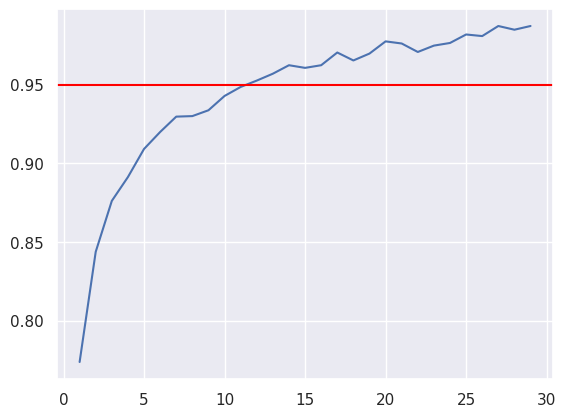

In [64]:
processing_probability = dict()

elapsed_time, input_moments, processing_time = generate_T1_t2_exp(SIMULATION_TIME, LAMBDA_1, LAMBDA_2)

threshold_crossed = False

for buffer_size in range(1, 30):
    processing_probability[buffer_size] = generalized_model_with_buffer(input_moments, processing_time, buffer_size)

    if processing_probability[buffer_size] >= 0.95 and not threshold_crossed:
        threshold_crossed = True
        print(f'Минимальный размер буфера для вероятности обработки >= 0.95: {buffer_size}')

sns.lineplot(processing_probability)
plt.axhline(y=0.95, color='red')

Минимальный размер буфера для вероятности обработки >= 0.95: 14


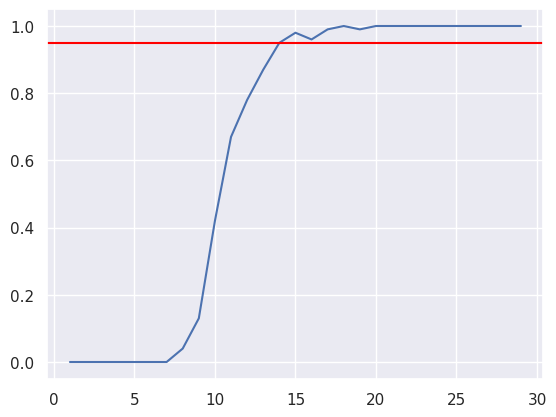

In [70]:
processing_probability = dict()

SAMPLES_NUMBER = 100

threshold_crossed = False

for buffer_size in range(1, 30):
    probabilities = list()
    for _ in range(SAMPLES_NUMBER):
        elapsed_time, input_moments, processing_time = generate_T1_t2_exp(SIMULATION_TIME, LAMBDA_1, LAMBDA_2)

        probabilities.append(generalized_model_with_buffer(input_moments, processing_time, buffer_size))

    sampled_probability = len(list(filter(lambda x: x >= 0.95, probabilities))) / len(probabilities)

    processing_probability[buffer_size] = sampled_probability

    if processing_probability[buffer_size] >= 0.95 and not threshold_crossed:
        threshold_crossed = True
        print(f'Минимальный размер буфера для вероятности обработки >= 0.95: {buffer_size}')

sns.lineplot(processing_probability)
plt.axhline(y=0.95, color='red')